## Import Standard Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Loading Datasets

In [2]:
df=pd.read_csv('C:/Users/INDIA/Downloads/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types of Variables:**
1. Continuous: Age and Fare
2. Categorical: Sex and Embarked
3. Discrete: SibSp and Parch
4. Alphanumeric: Cabin

In [4]:
## Shape of our dataset 
df.shape

(891, 12)

In [5]:
## Columns of the data

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###  Checking for missing values

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* We have 177 null values in Age column.
* 687 missing values in Cabin column.
* 2 missing values in Embarked column.

### Remove the columns that will not help to predict our target variable

In [9]:
df=df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
## Get the value counts for the dataset

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [14]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### Seeking for correlations¶

In [15]:
corre=df.corr()

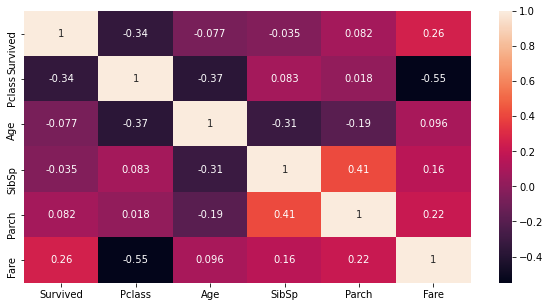

In [16]:
# to get the heatmap of correlation

plt.figure(figsize=(10,5))
sns.heatmap(corre,xticklabels=corre.columns, yticklabels=corre.columns,annot=True) 
plt.show()

## Exploratory Data Analysis

### *Now we're going to visualise the correlation of each variable with the target variable i.e, Survived.*

### 1. Pclass

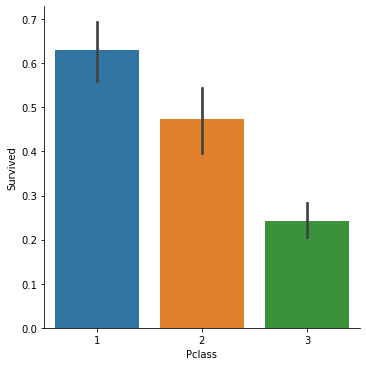

In [17]:
sns.catplot(x = "Pclass", 
            y="Survived",
            data = df,
            kind="bar")
plt.show()

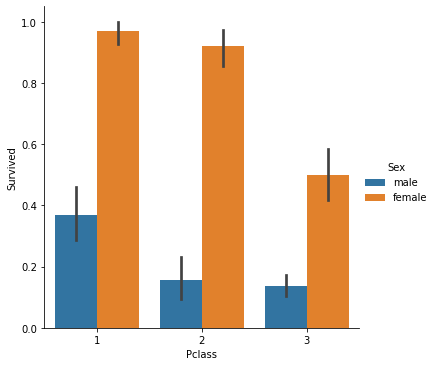

In [18]:
## Pclass vs Survived By Sex

sns.catplot(x = "Pclass",
            y="Survived", 
            hue="Sex",
            data=df, 
            kind="bar")
plt.show()

**Note:**
* In each class females have much higher chances of survival in comparison to male passengers.

### 2. Sex

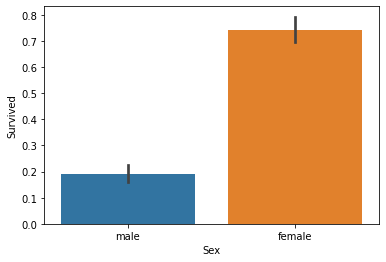

In [19]:
sns.barplot(x="Sex", 
            y="Survived",
            data=df)
plt.show()

**Note:**
* From the above graph it's quite obvious that females have more chances of survival in comparison to males. 

### 3. SibSp

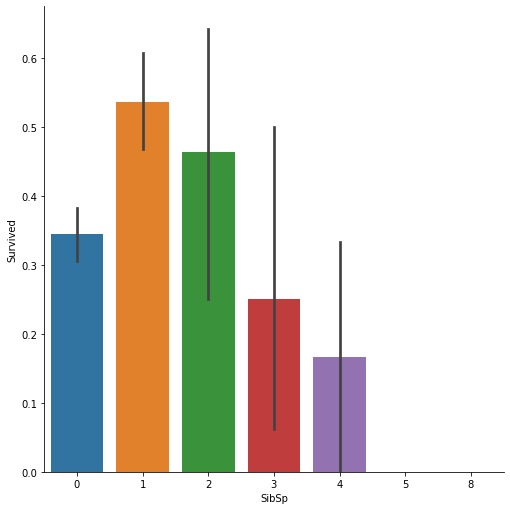

In [20]:
sns.catplot(x = "SibSp",
            y = "Survived",
            data = df, 
            kind="bar",
           height=7)
plt.show()

**Note:** 
* Passengers having 1 or 2 siblings have good chances of survival
* More no. of siblings -> Less chances of survival

## Building Machine Learning Models 

### *Machine learning workflow*

### 1 Extract features

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [22]:
## Target variable

y=df['Survived']

In [23]:
x=df.drop('Survived',axis=1)

In [24]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [25]:
## 1.1 Features and target should not have any null values

x.isna().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

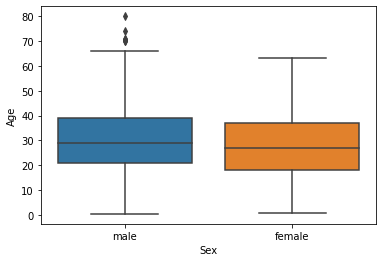

In [26]:
_=sns.boxplot(x="Sex",y="Age",data=df)


In [27]:
x["Age"]=x["Age"].fillna(x["Age"].mean())

In [28]:
x.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [29]:
y.isna().sum()

0

In [30]:
## Features should be numeric

x.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

*Sex is not in numeric, so we will use one-hot encoding or dummy encoding to change it to numeric*

In [31]:
x=pd.get_dummies(x,columns=['Sex'],drop_first=True)

In [32]:
x.dtypes

Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Sex_male      uint8
dtype: object

In [33]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [34]:
## Features should be of the type array/ dataframe

type(x)

pandas.core.frame.DataFrame

In [35]:
##  Features should have some rows and columns

x.shape

(891, 6)

### 2. Split the dataset into training and testing

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12,stratify=y)

In [37]:
## Features should be on the same scale

x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### 3. Train the model on the training data

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree=DecisionTreeClassifier(min_samples_split=7,criterion='gini',random_state=0)

In [41]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=7, random_state=0)

### 4. Test the model on the testing data

In [42]:
tree.score(x_test,y_test)

0.8208955223880597

In [43]:
## lets check the evaluation metrics of our default model

## Importing classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [44]:
## Making predictions on test data

predictions=tree.predict(x_test)
predictions

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0], dtype=int64)

In [45]:
#Printing classification report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       165
           1       0.80      0.72      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [46]:
print(confusion_matrix(y_test,predictions))

[[146  19]
 [ 29  74]]


In [47]:
print(accuracy_score(y_test,predictions))

0.8208955223880597
